# Decentralized Consensus Detection
Here we study how agents can detect the convergence to average consensus in a decentralized and real-time manner to abort the process and save edges travelled and time spent. We implemented a range of different heuristics.

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=BIGGER_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

from exp_dcd_heuristics import run_simulation

%load_ext autoreload
%autoreload 2

For none, total number of edges travelled by all agents is 29723
For fix_enc, total number of edges travelled by all agents is 6571
For abs_chg, total number of edges travelled by all agents is 10052
For std_est, total number of edges travelled by all agents is 10412
For conv_rate, total number of edges travelled by all agents is 13907
For unknown_env, total number of edges travelled by all agents is 12632


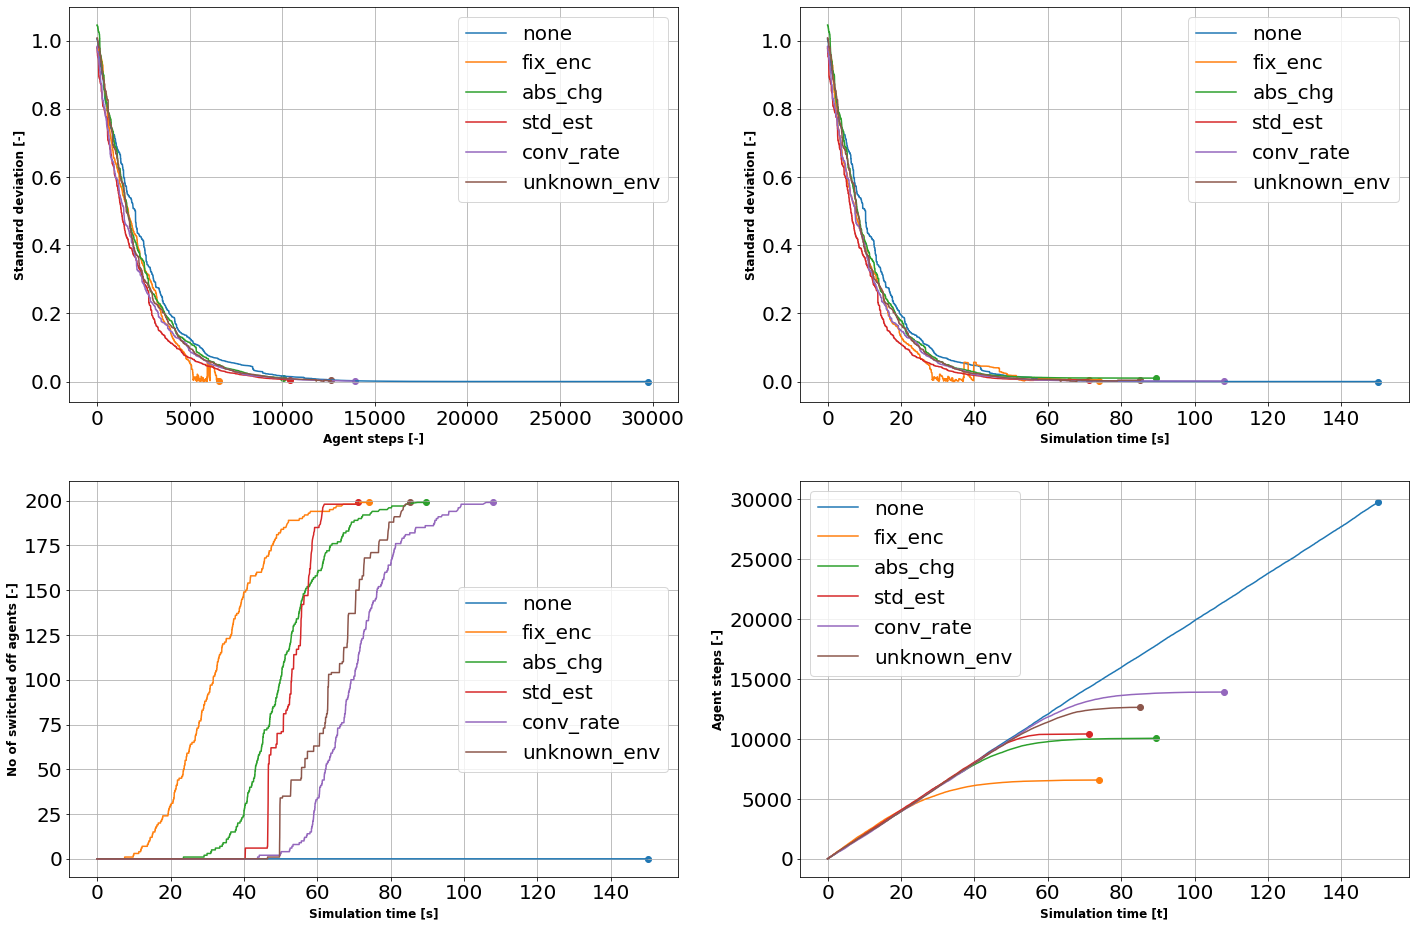

In [2]:
# agents
no_agents = 200
clock_rate = 1 # Poisson process for asynchronous agent actions
comm_limit = 1 # no of neighbors with whom a value can be averaged
agents = (no_agents, clock_rate, comm_limit)

# graph
graph_type = 'Gnp'
graph_size = 1000 # n
edge_probability = 0.5 # p
graph = (graph_type, graph_size, edge_probability)

# decentralized consensus detection (DCD)
heuristics_list = ['none', 'fix_enc', 'abs_chg', 'std_est', 'conv_rate', 'unknown_env']
n_fix_enc = 5 # no of encounters before switching off
e_abs_chg = 0.05 # convergence when delta_val < e_abs_chg
n_abs_chg = 5 # agent switches off when having subsequently seen n_abs_chg agents with delta_val < e_abs_chg
w_std_est = 5 # sliding window size for continuous estimation of standard deviation
d_std_est = 0.01 # agent switches off when std_est < d_std_est
w_conv_rate = 10 # sliding window size for continuous estimation of convergence rate
p_conv_rate = 0.0001 # agent switches off when conv_rate < p_conv_rate
w_unknown_env = 10
z_unknown_env = 0.01

pos_feedback = 'off'
n_off = 5 # agent switches off when having subsequently seen n_off other switched off agents

# simulation
simulation_time = 150
simulation_type = 'sweep'
simulation = (simulation_time, simulation_type)

# run, sit back, watch the extravaganza
fig, axs = plt.subplots(2, 2, figsize=(24,16))
for heuristic in heuristics_list:
    dcd = (heuristic, n_fix_enc, e_abs_chg, n_abs_chg, w_std_est, d_std_est, w_conv_rate, p_conv_rate, w_unknown_env, z_unknown_env, pos_feedback, n_off)
    (std_rt_val, std_rt_t, step_count_rt, agents_off_t, agents_off_val) = run_simulation(agents, graph, dcd, simulation)
    axs[0][0].plot(step_count_rt, std_rt_val, label='{}'.format(heuristic))
    axs[0][1].plot(std_rt_t, std_rt_val, label='{}'.format(heuristic))
    axs[1][0].plot(agents_off_t, agents_off_val, label='{}'.format(heuristic))
    axs[1][1].plot(std_rt_t, step_count_rt, label='{}'.format(heuristic))
    
    axs[0][0].scatter(step_count_rt[-1], std_rt_val[-1])
    axs[0][1].scatter(std_rt_t[-1], std_rt_val[-1])
    axs[1][0].scatter(agents_off_t[-1], agents_off_val[-1])
    axs[1][1].scatter(std_rt_t[-1], step_count_rt[-1])

axs[0][0].set_xlabel('Agent steps [-]', fontsize='large', fontweight='bold')
axs[0][0].set_ylabel('Standard deviation [-]', fontsize='large', fontweight='bold')
axs[0][0].legend(loc="upper right")   
axs[0][0].grid('k')
    
axs[0][1].set_xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
axs[0][1].set_ylabel('Standard deviation [-]', fontsize='large', fontweight='bold')
axs[0][1].legend(loc="upper right")   
axs[0][1].grid('k')

axs[1][0].set_xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
axs[1][0].set_ylabel('No of switched off agents [-]', fontsize='large', fontweight='bold')
axs[1][0].legend(loc="center right")
axs[1][0].grid('k')

axs[1][1].set_xlabel('Simulation time [t]', fontsize='large', fontweight='bold')
axs[1][1].set_ylabel('Agent steps [-]', fontsize='large', fontweight='bold')
axs[1][1].legend(loc="upper left")
axs[1][1].grid('k')

plt.savefig('./data/dcd_heuristics/averaging_costs.png')
plt.show()
plt.close()